In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 22})

In [2]:
#Imports the models. NP-> No power corrections. WP-> With power corrections

NP_Br_low = tf.keras.models.load_model('Br_no_power_low_reg.h5')
NP_Br_med = tf.keras.models.load_model('Br_no_power_med_reg.h5')
NP_Br_high = tf.keras.models.load_model('Br_no_power_high_reg.h5')


NP_P4_low = tf.keras.models.load_model('P4_no_power_low_reg.h5')
NP_P4_med = tf.keras.models.load_model('P4_no_power_med_reg.h5')
NP_P4_high = tf.keras.models.load_model('P4_no_power_high_reg.h5')


NP_P5_low = tf.keras.models.load_model('P5_no_power_low_reg.h5')
NP_P5_med = tf.keras.models.load_model('P5_no_power_med_reg.h5')
NP_P5_high = tf.keras.models.load_model('P5_no_power_high_reg.h5')

#########

WP_Br_low = tf.keras.models.load_model('Br_power_low_reg.h5')
WP_Br_med = tf.keras.models.load_model('Br_power_med_reg.h5')
WP_Br_high = tf.keras.models.load_model('Br_power_high_reg.h5')


WP_P4_low = tf.keras.models.load_model('P4_power_low_reg.h5')
WP_P4_med = tf.keras.models.load_model('P4_power_med_reg.h5')
WP_P4_high = tf.keras.models.load_model('P4_power_high_reg.h5')


WP_P5_low = tf.keras.models.load_model('P5_power_low_reg.h5')
WP_P5_med = tf.keras.models.load_model('P5_power_med_reg.h5')
WP_P5_high = tf.keras.models.load_model('P5_power_high_reg.h5')

In [3]:
#Calculates the predictions

q = np.linspace(0.1,8,1000)

NP_Pred_br_low = NP_Br_low.predict(q)
NP_Pred_br_med = NP_Br_med.predict(q)
NP_Pred_br_high = NP_Br_high.predict(q)


NP_Pred_P4_low = NP_P4_low.predict(q)
NP_Pred_P4_med = NP_P4_med.predict(q)
NP_Pred_P4_high = NP_P4_high.predict(q)


NP_Pred_P5_low = NP_P5_low.predict(q)
NP_Pred_P5_med = NP_P5_med.predict(q)
NP_Pred_P5_high = NP_P5_high.predict(q)

###########

WP_Pred_br_low = WP_Br_low.predict(q)
WP_Pred_br_med = WP_Br_med.predict(q)
WP_Pred_br_high = WP_Br_high.predict(q)


WP_Pred_P4_low = WP_P4_low.predict(q)
WP_Pred_P4_med = WP_P4_med.predict(q)
WP_Pred_P4_high = WP_P4_high.predict(q)


WP_Pred_P5_low = WP_P5_low.predict(q)
WP_Pred_P5_med = WP_P5_med.predict(q)
WP_Pred_P5_high = WP_P5_high.predict(q)

In [4]:
#Loads the dataframes

Data_br = pd.read_pickle("Br_no_power_synth")

Data_P4 = pd.read_pickle("P4_no_power_synth")

Data_P5 = pd.read_pickle("P5_no_power_synth")


# Multiplot comparison between the power correction models and no power correction models

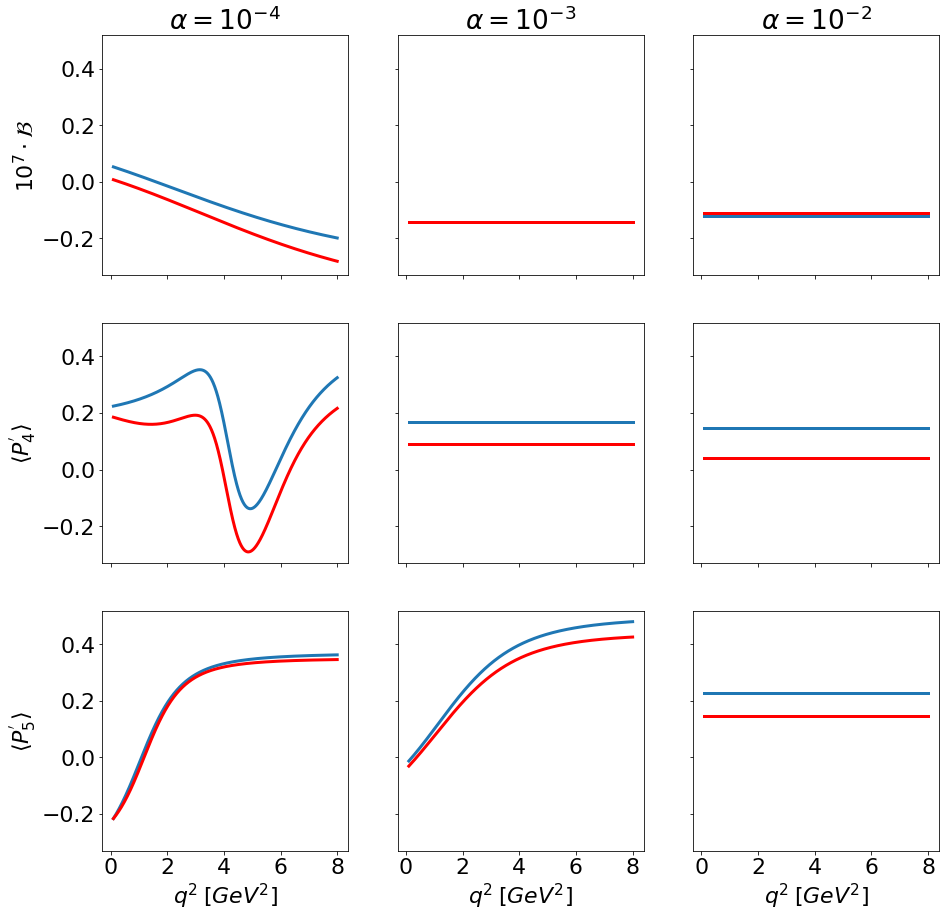

In [5]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharey=True, sharex= True, facecolor='w')

ax1.set_xticks([0,2,4,6,8])

ax1.plot(q,WP_Pred_br_low, linewidth=3)
ax1.plot(q,NP_Pred_br_low, linewidth=3, color="red")
ax1.set_title(r'$\alpha = 10^{-4} $')
ax1.set_ylabel(r'$10^7\cdot\mathcal{B}$')

ax2.plot(q,WP_Pred_br_med, linewidth=3)
ax2.plot(q,NP_Pred_br_med, linewidth=3, color="red")
ax2.set_title(r'$\alpha = 10^{-3} $')

ax3.plot(q,WP_Pred_br_high, linewidth=3)
ax3.plot(q,NP_Pred_br_high, linewidth=3, color="red")
ax3.set_title(r'$\alpha = 10^{-2} $')



ax4.plot(q,WP_Pred_P4_low, linewidth=3)
ax4.plot(q,NP_Pred_P4_low, linewidth=3, color="red")
ax4.set_ylabel(r"$\langle P_4^{'} \rangle $")

ax5.plot(q,WP_Pred_P4_med, linewidth=3)
ax5.plot(q,NP_Pred_P4_med, linewidth=3, color="red")

ax6.plot(q,WP_Pred_P4_high, linewidth=3)
ax6.plot(q,NP_Pred_P4_high, linewidth=3, color="red")



ax7.plot(q,WP_Pred_P5_low, linewidth=3)
ax7.plot(q,NP_Pred_P5_low, linewidth=3, color="red")
ax7.set_ylabel(r"$ \langle P_5^{'} \rangle $")
ax7.set_xlabel(r'$q^2 \: [GeV^2]$')

ax8.plot(q,WP_Pred_P5_med, linewidth=3)
ax8.plot(q,NP_Pred_P5_med, linewidth=3, color="red")
ax8.set_xlabel(r'$q^2 \: [GeV^2]$')

ax9.plot(q,WP_Pred_P5_high, linewidth=3)
ax9.plot(q,NP_Pred_P5_high, linewidth=3, color="red")
ax9.set_xlabel(r'$q^2 \: [GeV^2]$')

#plt.savefig("NN_comparison.png", dpi=200, bbox_inches="tight")

plt.show()

# Absolute difference between predictions 

In [6]:
#Computes the difference bewteen predictions.
Diff_br_low  = WP_Pred_br_low-NP_Pred_br_low
Diff_br_med =  WP_Pred_br_med-NP_Pred_br_med
Diff_br_high =  WP_Pred_br_high-NP_Pred_br_high

Diff_P4_low =  WP_Pred_P4_low-NP_Pred_P4_low
Diff_P4_med =  WP_Pred_P4_med-NP_Pred_P4_med
Diff_P4_high =  WP_Pred_P4_high-NP_Pred_P4_high

Diff_P5_low =  WP_Pred_P5_low-NP_Pred_P5_low
Diff_P5_med =  WP_Pred_P5_med-NP_Pred_P5_med
Diff_P5_high = WP_Pred_P5_high-NP_Pred_P5_high

In [7]:
Diff_br_low

array([[0.04536566],
       [0.04536437],
       [0.04536318],
       [0.0453621 ],
       [0.04536105],
       [0.04536004],
       [0.04535924],
       [0.04535849],
       [0.04535767],
       [0.04535715],
       [0.04535648],
       [0.04535612],
       [0.04535558],
       [0.04535534],
       [0.04535513],
       [0.04535501],
       [0.04535475],
       [0.04535486],
       [0.04535491],
       [0.04535498],
       [0.04535515],
       [0.04535555],
       [0.04535597],
       [0.04535649],
       [0.04535697],
       [0.04535766],
       [0.04535831],
       [0.04535917],
       [0.04536004],
       [0.04536093],
       [0.04536198],
       [0.04536302],
       [0.04536445],
       [0.04536563],
       [0.04536693],
       [0.04536845],
       [0.04537001],
       [0.04537158],
       [0.04537335],
       [0.0453751 ],
       [0.04537702],
       [0.045379  ],
       [0.04538096],
       [0.04538312],
       [0.04538539],
       [0.04538754],
       [0.04539002],
       [0.045

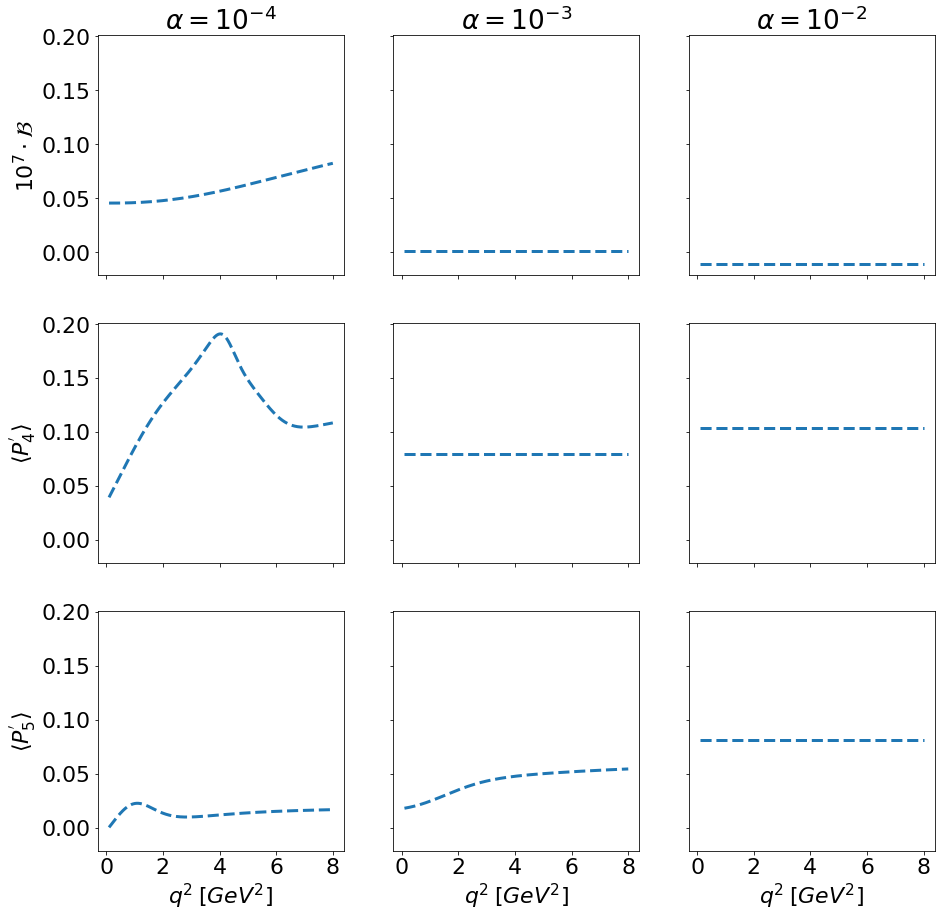

In [8]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, sharey=True, sharex= True, facecolor='w')

ax1.set_xticks([0,2,4,6,8])

ax1.plot(q,Diff_br_low, linewidth=3, linestyle="dashed")
ax1.set_title(r'$\alpha = 10^{-4} $')
ax1.set_ylabel(r'$10^7\cdot\mathcal{B}$')

ax2.plot(q,Diff_br_med, linewidth=3, linestyle="dashed")
ax2.set_title(r'$\alpha = 10^{-3} $')

ax3.plot(q,Diff_br_high, linewidth=3, linestyle="dashed")
ax3.set_title(r'$\alpha = 10^{-2} $')



ax4.plot(q,Diff_P4_low, linewidth=3, linestyle="dashed")
ax4.set_ylabel(r"$\langle P_4^{'} \rangle $")

ax5.plot(q,Diff_P4_med, linewidth=3, linestyle="dashed")

ax6.plot(q,Diff_P4_high, linewidth=3, linestyle="dashed")




ax7.plot(q,Diff_P5_low, linewidth=3, linestyle="dashed")
ax7.set_ylabel(r"$ \langle P_5^{'} \rangle $")
ax7.set_xlabel(r'$q^2 \: [GeV^2]$')

ax8.plot(q,Diff_P5_med, linewidth=3, linestyle="dashed")
ax8.set_xlabel(r'$q^2 \: [GeV^2]$')

ax9.plot(q,Diff_P5_high, linewidth=3, linestyle="dashed")
ax9.set_xlabel(r'$q^2 \: [GeV^2]$')

#plt.savefig("Model_difference_comparison.png", dpi=200, bbox_inches="tight")

plt.show()

# Example of a dataset: P5 with power corrections


In [47]:
P5_data = pd.read_pickle("P5_selection")

Data_P5_pow = pd.read_pickle("P5_power_synth")

In [10]:
P5=P5_data[8:-1]

P5

,N_Obs,Name,Bin,Experiment,Th_Pred,Th_Err,Exp_Value,Exp_Err,Diff,Joint_Err,CM,Side
19,20,P5p(B-->K*mumu),"[0.1,0.98]",LHCb,0.674265,0.147078,0.521,0.097985,-0.153265,0.176728,0.54,0.44
27,28,P5p(B-->K*mumu),"[1.1,2.5]",LHCb,0.189121,0.131021,0.365,0.122691,0.175879,0.179498,1.80,0.70
35,36,P5p(B-->K*mumu),"[2.5,4]",LHCb,-0.475046,0.133816,-0.150,0.147513,0.325046,0.199165,3.25,0.75
43,44,P5p(B-->K*mumu),"[4,6]",LHCb,-0.819395,0.086586,-0.439,0.116692,0.380395,0.145307,5.00,1.00
51,52,P5p(B-->K*mumu),"[6,8]",LHCb,-0.936999,0.080754,-0.583,0.094868,0.353999,0.124584,7.00,1.00


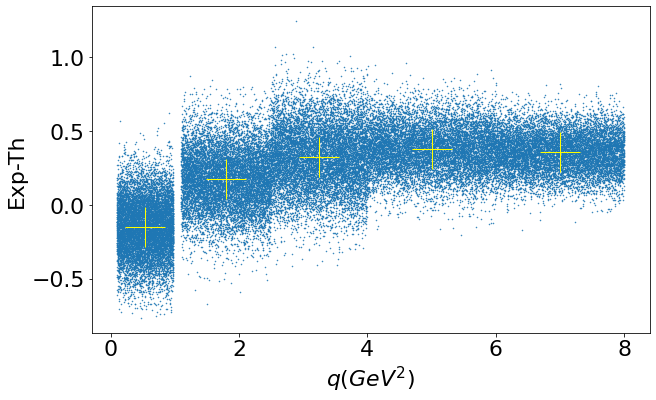

In [49]:
x = P5.CM
Side = P5.Side
Diff = P5.Diff
sigma = P5.Joint_Err


plt.rcParams.update({'figure.figsize': (10,6)})

plt.plot(Data_P5_pow.q2,Data_P5_pow.Diff,'o', markersize=0.5, alpha=1)
plt.plot(x, Diff, '+',linewidth=30, markersize=40, color="yellow")





plt.ylabel("Exp-Th")
plt.xlabel(r'$q(GeV^2)$')

plt.savefig("P5_power_dataset.png", bbox_inches="tight", dpi=200)

plt.show()

In [13]:
Data_P5.Diff

7522    -0.028915
26124    0.216699
37616    0.257078
49941    0.268634
1898    -0.338187
           ...   
26212    0.292324
11211    0.258007
36162    0.306034
42802    0.211034
35211    0.246141
Name: Diff, Length: 50000, dtype: float64

# Generating tabular data

In [62]:
P5 = round(P5,3)

P5

P5.to_excel("P5_table.xlsx")

In [64]:
P4 = pd.read_pickle("P4_B0_K_star")

P4 = round(P4[3:-1], 3)

P4.to_excel("P4_table.xlsx")

In [63]:
Br = pd.read_pickle("B_zero_to_K_star")

Br=round(Br[0:-1],3)

Br

Br.to_excel("Br_table.xlsx")
